<a href="https://colab.research.google.com/github/cybertron002/TSF-GRIPJUNE21/blob/main/TASK_6_Decision_Tree_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author
###Somesh Anand
GRIPJUNE21

#Objective : Create the Decision Tree classifier and visualize it graphically.

In [ ]:
#IMPORTING LIBRARIES FOR THIS TASK
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics


###Reading dataset

In [ ]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)

(150, 6)


In [ ]:
#CHECKING NULL VALUES
df.isna().sum().to_frame('Null Values')

,Null Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


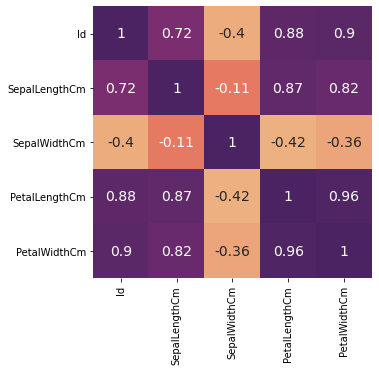

In [ ]:
# Correlation between Variables
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='flare', annot=True, cbar=False, annot_kws={'size': 14})
plt.show()

#Training and test datasets

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
# Splitting data into Training & Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Building model

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Predicting

In [ ]:
y_pred = model.predict(X_test)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-versicolor
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


#Evaluating Model

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


#Visualising decision tree

Features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


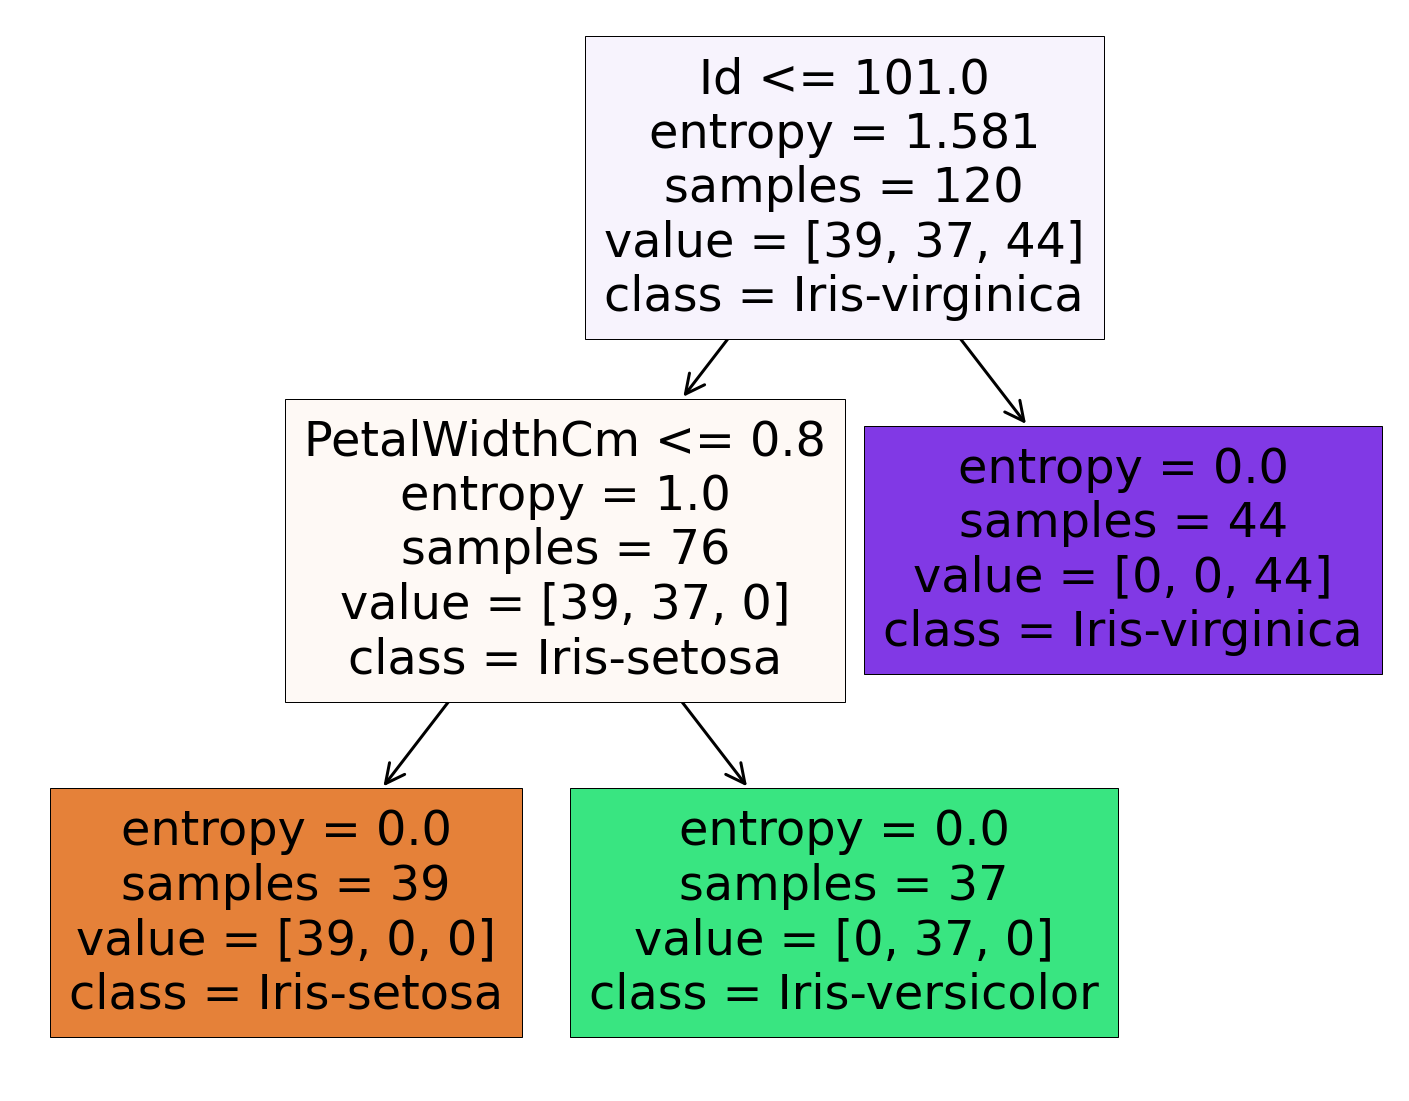

In [ ]:
from sklearn import tree
text = tree.export_text(model)
features = df.columns.tolist()[:-1]
target = df.Species.unique()
print(f'Features: {features}\nTarget: {target}')
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(model, feature_names=features, class_names=target, filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)